In [2]:
# データ準備
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
# アヤメ品種データの読み込み
from sklearn.datasets import load_iris

iris_data = load_iris()

# 説明変数
X_array = iris_data.data
# カラムデータを取得
X0=X_array[:,0]
X1=X_array[:,1]

# 目的変数
t_array = iris_data.target
T=t_array

N=len(X0)
petal_data=npy.zeros((N,2))
T3 = npy.zeros((N,3), dtype=npy.uint8)

#データの設定
for i in range(N):
    # がく片データをまとめる
    petal_data[i]=[X0[i], X1[i]]
    
    # 0[1,0,0]　1[0,1,0]　2[0,0,1]
    if T[i] == 0:
        T3[i]=[1,0,0]
    elif T[i] == 1:
        T3[i]=[0,1,0]
    else:
        T3[i]=[0,0,1]


X_range0=[min(X0)*0.9,max(X0)*1.1]
X_range1=[min(X1)*0.9,max(X1)*1.1]

# データをclassdata3.npzファイルに保存する
npy.savez('classdata3.npz',X=petal_data,T3=T3,X_range0=X_range0,X_range1=X_range1,X_n=N)


In [3]:
# データの設定

# データをclassdata3.npzファイルから取り出す
sample_data = npy.load('classdata3.npz')
# 入力値の設定
X=sample_data['X']
# クラス（答え）の設定
T3=sample_data['T3']
# がく片の長さの表示範囲設定
X_range0=sample_data['X_range0']
# がく片の幅の表示範囲設定
X_range1=sample_data['X_range1']
# データ数の設定
N=sample_data['X_n']

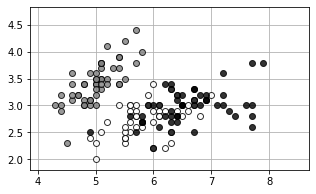

In [5]:
# データプロットの表示
import matplotlib.pyplot as plt
%matplotlib inline

# データ表示
def show_data3(x,t):
    wk,K = t.shape
    c=[[.5,.5,.5],[1,1,1],[0,0,0]]
    for k in range(K):
        # 平日（クラスA）はグレー表示、休日（クラスB）は白抜き表示
        plt.plot(x[t[:, k]==1,0],x[t[:, k]==1,1],linestyle='none',markeredgecolor='black',marker='o',color=c[k],alpha=0.8)
    plt.grid(True)
    
plt.figure(figsize=(5,3))
plt.subplots_adjust(wspace=0.5)
show_data3(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

[[-32.8   29.94  91.53]
 [ 16.95 -13.67 -37.74]
 [ 18.85 -13.27 -50.79]]
CEE=0.37


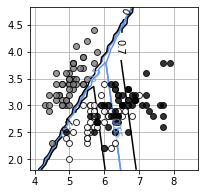

In [11]:
from scipy.optimize import minimize

# 3クラス分類ロジスティック回帰モデル
def logistic3(x0,x1,w):
    K=3
    w=w.reshape((3,3))
    n = len(x1)
    y = npy.zeros((n,K))
    for k in range(K):
        y[:, k] = npy.exp(w[k,0]*x0 + w[k,1]*x1+w[k,2])
    wk = npy.sum(y,axis=1)
    wk = y.T / wk
    y = wk.T
    return y

# 交差エントロピー誤差
def cee_logistic3(w,x,t):
    X_n=x.shape[0]
    y=logistic3(x[:,0],x[:,1],w)
    cee = 0
    N,K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee -(t[n,k]*npy.log(y[n,k]))
    cee = cee/X_n
    return cee

# 交差エントロピー誤差の微分
def dcee_logistic3(w,x,t):
    X_n=x.shape[0]
    y=logistic3(x[:,0],x[:,1],w)
    dcee = npy.zeros((3,3))
    N,K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k,:] = dcee[k,:] -(t[n,k]-y[n,k])*npy.r_[x[n,:],1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

# パラメータサーチ
def fit_logistic3(w_init,x,t):
    res = minimize(cee_logistic3,w_init,args=(x,t),jac=dcee_logistic3,method="CG")
    return res.x

# 等高線表示
def show_contour_logistic3(w):
    xn = 30
    x0=npy.linspace(X_range0[0],X_range0[1],xn)
    x1=npy.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = npy.meshgrid(x0,x1)
    y = npy.zeros((xn,xn,3))
    for i in range(xn):
        wk = logistic3(xx0[:,i],xx1[:,i],w)
        for j in range(3):
            y[:,i,j]=wk[:,j]
    for j in range(3):
        cont=plt.contour(xx0,xx1,y[:,:,j],levels=(0.5,0.7),colors=['cornflowerblue','k'])
        cont.clabel(fmt='%.1f',fontsize=10)
    plt.grid(True)

W_init = npy.zeros((3,3))
W_init = [[1,1,1],[1,1,1],[1,1,1]]
W=fit_logistic3(W_init,X,T3)
print(npy.round(W.reshape((3,3)),2))
cee = cee_logistic3(W,X,T3)
print("CEE={0:.2f}".format(cee))

plt.figure(figsize=(3,3))
show_data3(X,T3)
show_contour_logistic3(W)
plt.show()